In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pandas as a standard will read in float datatypes with 3 decimal points, which won't be particularly useful here
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [2]:
# the code below was used to inspect the full extent of the data frames. only use to fully check the tables that are produced

# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
internal = pd.read_csv('internal.csv')

In [4]:
external = pd.read_csv('external.csv')

In [5]:
internal.head()

,internal_id,first_name,last_name,work_email,phone,street,city,state,postal_code,account,title,department,industry,joined,cancelled
0,WwklBtDLoM7h,Kathleen,Wyatt,kathleen.wyatt@newmanperez.org,431.791.4316x0289,673 Andrews Meadow Suite 005,Latashastad,PA,62422,Newman-Perez,Diplomatic Services operational officer,Fulfillment,Transportation,2019-06-16,2020-02-12
1,WwklBtDLo2b7,Rodney,Martinez,rodney.martinez@newmanperez.org,001-090-588-5945x71950,0242 Hayden Parkway,Brittanystad,PA,62094,Newman-Perez,Chartered management accountant,Sustainability,Transportation,2018-05-11,2020-06-10
2,WwklBtDLo2ni,Heather,Burgess,heather.burgess@newmanperez.org,224-998-9960,6729 Monica Streets,Autumnborough,PA,98174,Newman-Perez,"Scientist, biomedical",Sustainability,Transportation,2020-04-30,NaN
3,WwklBtDLoMvm,Kelsey,Medina,kmedina@nguyenpeterson.net,914.976.0981x510,47071 Palmer Ford,Port Eugenehaven,PA,1248,Nguyen-Peterson,Data processing manager,Legal,Consulting,2018-10-26,NaN
4,WwklBtDLoMh3,Jimmy,Cherry,jcherry@nguyenpeterson.net,(876)053-3456,02779 Mason Meadows Suite 468,East Christina,PA,47485,Nguyen-Peterson,Museum/gallery exhibitions officer,Finance,Consulting,2019-08-31,2020-02-05


In [6]:
external.head()

,external_id,name,company,external_email,lifetime_value
0,nNZYIQGyVhrp,Cory J,"Brooks, Williams and Hamilton",cjoseph@brookswilliamshamilton.com,420200
1,nNZYIQGyVxa7,K S,"Ross, Brown and Williams",kathy.sanchez@rossbrownwilliams.com,539500
2,nNZYIQGyVvWi,Tammy Mcguire,Huynh-Gonzalez,tammy.mcguire@huynhgonzalez.com,885100
3,nNZYIQGyV08l,D Robinson,Allen LLC,drobinson@allenllc.com,82500
4,nNZYIQGyVMCk,Raymond Travis,Levy-Atkinson,raymond.travis@levyatkinson.com,1593800


In [7]:
# Checking value counts to verify uniqueness

internal['work_email'].value_counts()

BeverlyMolina@bryantwilliams.com        1
jpalmer@phillipscook.com                1
white790@mcleanbutlerjohnson.com        1
kara.king@mcmillanporterwilliams.org    1
michael.flores@graywhitaker.com         1
                                       ..
mcdaniel263@levyclarkchase.com          1
tdavis@englishsmith.com                 1
VincentEvans@shawspearspope.com         1
mwallace@myerssanchez.com               1
kevans@fryeltd.com                      1
Name: work_email, Length: 10000, dtype: int64

In [8]:
external['external_email'].value_counts()

BeverlyMolina@bryantwilliams.com               1
wwalker@mccormicknelsonbarnes.com              1
christopher.friedman@dunncunninghamreed.com    1
mfoster@woodwardmeyer.org                      1
donald.hamilton10@aol.com                      1
                                              ..
ngriffith500@sbcglobal.net                     1
mwallace@myerssanchez.com                      1
cole385@brownbuck.com                          1
cmoore@webbhillwood.com                        1
woods748@aol.com                               1
Name: external_email, Length: 10000, dtype: int64

In [9]:
# To start, I want to split the name column from the external table so I have two criteria I can sort by later.

new = external['name'].str.split(' ',expand=True)

In [10]:
external['first_name_ex'] = new[0]

In [11]:
external['last_name_ex'] = new[1]

In [12]:
# Dropping old name column to replace with new first name and last name columns

external = external.drop('name',axis=1)

In [13]:
# Reordering columns

external = external[['external_id','first_name_ex','last_name_ex','company','external_email','lifetime_value']]

In [14]:
external

,external_id,first_name_ex,last_name_ex,company,external_email,lifetime_value
0,nNZYIQGyVhrp,Cory,J,"Brooks, Williams and Hamilton",cjoseph@brookswilliamshamilton.com,420200
1,nNZYIQGyVxa7,K,S,"Ross, Brown and Williams",kathy.sanchez@rossbrownwilliams.com,539500
2,nNZYIQGyVvWi,Tammy,Mcguire,Huynh-Gonzalez,tammy.mcguire@huynhgonzalez.com,885100
3,nNZYIQGyV08l,D,Robinson,Allen LLC,drobinson@allenllc.com,82500
4,nNZYIQGyVMCk,Raymond,Travis,Levy-Atkinson,raymond.travis@levyatkinson.com,1593800
...,...,...,...,...,...,...
9995,nNZYIQGyVvzd,Shari,Murphy,Perez LLC,smurphy@perezllc.org,1692400
9996,nNZYIQGyVvUE,Caroline,J,"Haley, Walker and Harper",caroline.jackson@haleywalkerharper.com,2821400
9997,nNZYIQGyVSM1,Deborah,Collins,N,collins509@norrisplc.com,4424200
9998,nNZYIQGyVv81,William,Newman,HSA,william.newman@hayesscottadams.com,1356000


In [15]:
# My general approach to this problem was to join the tables based on the emails column, which seemed to be the only feature
# of the dataset that would be relatively unique and useful for joining the datasets.

matched_data = pd.merge(internal,external,how='inner',left_on='work_email',right_on='external_email')
matched_data

,internal_id,first_name,last_name,work_email,phone,street,city,state,postal_code,account,...,department,industry,joined,cancelled,external_id,first_name_ex,last_name_ex,company,external_email,lifetime_value
0,WwklBtDLoM7h,Kathleen,Wyatt,kathleen.wyatt@newmanperez.org,431.791.4316x0289,673 Andrews Meadow Suite 005,Latashastad,PA,62422,Newman-Perez,...,Fulfillment,Transportation,2019-06-16,2020-02-12,nNZYIQGyVxc2,K,Wyatt,Newman-Perez,kathleen.wyatt@newmanperez.org,681400
1,WwklBtDLo2b7,Rodney,Martinez,rodney.martinez@newmanperez.org,001-090-588-5945x71950,0242 Hayden Parkway,Brittanystad,PA,62094,Newman-Perez,...,Sustainability,Transportation,2018-05-11,2020-06-10,nNZYIQGyVh8c,Rodney,Martinez,Newman-Perez,rodney.martinez@newmanperez.org,3833600
2,WwklBtDLo2ni,Heather,Burgess,heather.burgess@newmanperez.org,224-998-9960,6729 Monica Streets,Autumnborough,PA,98174,Newman-Perez,...,Sustainability,Transportation,2020-04-30,NaN,nNZYIQGyVhW1,Heather,Burgess,Newman-Perez,heather.burgess@newmanperez.org,1357600
3,WwklBtDLoMvm,Kelsey,Medina,kmedina@nguyenpeterson.net,914.976.0981x510,47071 Palmer Ford,Port Eugenehaven,PA,1248,Nguyen-Peterson,...,Legal,Consulting,2018-10-26,NaN,nNZYIQGyVxOX,Kelsey,Medina,Nguyen-Peterson,kmedina@nguyenpeterson.net,1838000
4,WwklBtDLoMh3,Jimmy,Cherry,jcherry@nguyenpeterson.net,(876)053-3456,02779 Mason Meadows Suite 468,East Christina,PA,47485,Nguyen-Peterson,...,Finance,Consulting,2019-08-31,2020-02-05,nNZYIQGyVx2g,Jimmy,Cherry,Nguyen-Peterson,jcherry@nguyenpeterson.net,111700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,WwklBtDLoJ8s,Jenny,Hahn,jhahn@baileymoore.com,855.727.0586x4660,98670 Bryce Ville Suite 535,East Marcushaven,PA,51170,Bailey-Moore,...,Tech,Sustainability,2018-05-30,2018-08-07,nNZYIQGyVAbR,Jenny,Hahn,Bailey-Moore,jhahn@baileymoore.com,215300
8093,WwklBtDLo2GC,Dawn,Carter,dawn.carter@turnersmithodonnell.com,+1-492-552-9298,2470 Phillips Club,South Christopher,TX,92201,"Turner, Smith and Odonnell",...,Operations,Tech,2019-11-10,NaN,nNZYIQGyVhDH,Dawn,Carter,"Turner, Smith and Odonnell",dawn.carter@turnersmithodonnell.com,502300
8094,WwklBtDLoAS6,Kelli,Nguyen,nguyen523@kellerfowlerwarner.org,(338)096-6807x40887,856 Steve Stream Suite 762,Stephanieberg,OR,49106,"Keller, Fowler and Warner",...,HR,Tech,2017-08-06,2018-12-04,nNZYIQGyVJrd,K,Nguyen,"Keller, Fowler and Warner",nguyen523@kellerfowlerwarner.org,384700
8095,WwklBtDLojKd,Jennifer,Bridges,jbridges@hansonkirby.com,(544)084-5220x365,8050 James Oval Apt. 264,Lake Timothystad,CA,25212,Hanson-Kirby,...,HR,Tech,2017-03-03,2019-08-18,nNZYIQGyV0z6,Jennifer,B,Hanson-Kirby,jbridges@hansonkirby.com,1303500


In [43]:
# 8097 rows means we have 1903 rows without a matching email. Will use an outer join to then separate the data into two new
# dataframes based on null values

df = pd.merge(internal,external,how='outer',left_on='work_email',right_on='external_email')
df['unique_key_ex'] = df['first_name_ex'] + ' ' + df['last_name_ex'] + ' ' + df['company']
df['unique_key_int'] = df['first_name'] + ' ' + df['last_name'] + ' ' + df['company']
df

,internal_id,first_name,last_name,work_email,phone,street,city,state,postal_code,account,...,joined,cancelled,external_id,first_name_ex,last_name_ex,company,external_email,lifetime_value,unique_key_ex,unique_key_int
0,WwklBtDLoM7h,Kathleen,Wyatt,kathleen.wyatt@newmanperez.org,431.791.4316x0289,673 Andrews Meadow Suite 005,Latashastad,PA,62422,Newman-Perez,...,2019-06-16,2020-02-12,nNZYIQGyVxc2,K,Wyatt,Newman-Perez,kathleen.wyatt@newmanperez.org,681400,K Wyatt Newman-Perez,Kathleen Wyatt Newman-Perez
1,WwklBtDLo2b7,Rodney,Martinez,rodney.martinez@newmanperez.org,001-090-588-5945x71950,0242 Hayden Parkway,Brittanystad,PA,62094,Newman-Perez,...,2018-05-11,2020-06-10,nNZYIQGyVh8c,Rodney,Martinez,Newman-Perez,rodney.martinez@newmanperez.org,3833600,Rodney Martinez Newman-Perez,Rodney Martinez Newman-Perez
2,WwklBtDLo2ni,Heather,Burgess,heather.burgess@newmanperez.org,224-998-9960,6729 Monica Streets,Autumnborough,PA,98174,Newman-Perez,...,2020-04-30,NaN,nNZYIQGyVhW1,Heather,Burgess,Newman-Perez,heather.burgess@newmanperez.org,1357600,Heather Burgess Newman-Perez,Heather Burgess Newman-Perez
3,WwklBtDLoMvm,Kelsey,Medina,kmedina@nguyenpeterson.net,914.976.0981x510,47071 Palmer Ford,Port Eugenehaven,PA,1248,Nguyen-Peterson,...,2018-10-26,NaN,nNZYIQGyVxOX,Kelsey,Medina,Nguyen-Peterson,kmedina@nguyenpeterson.net,1838000,Kelsey Medina Nguyen-Peterson,Kelsey Medina Nguyen-Peterson
4,WwklBtDLoMh3,Jimmy,Cherry,jcherry@nguyenpeterson.net,(876)053-3456,02779 Mason Meadows Suite 468,East Christina,PA,47485,Nguyen-Peterson,...,2019-08-31,2020-02-05,nNZYIQGyVx2g,Jimmy,Cherry,Nguyen-Peterson,jcherry@nguyenpeterson.net,111700,Jimmy Cherry Nguyen-Peterson,Jimmy Cherry Nguyen-Peterson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVvDc,Peter,Hall,"Sherman, Mata and Woods",phall785@outlook.com,3304900,"Peter Hall Sherman, Mata and Woods",NaN
11899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVafH,Jenna,Rivera,"Bennett, Sanchez and Guzman",jenna.rivera431@aol.com,120500,"Jenna Rivera Bennett, Sanchez and Guzman",NaN
11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVJ5l,Steven,Madden,Sullivan Group,smadden151@yahoo.com,1472200,Steven Madden Sullivan Group,NaN
11901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVvaD,Dale,Williams,"Hernandez, Jones and Williams",dwilliams703@aol.com,2100600,"Dale Williams Hernandez, Jones and Williams",NaN


In [44]:
# If my assumption that the missing spots with the respective emails from each category will yield the same sort results when
# sorted on first and last names, I should be able to concatenate

unmatched_internal = df[df['work_email'].isnull()].sort_values(['unique_key_ex'])

In [45]:
unmatched_internal

,internal_id,first_name,last_name,work_email,phone,street,city,state,postal_code,account,...,joined,cancelled,external_id,first_name_ex,last_name_ex,company,external_email,lifetime_value,unique_key_ex,unique_key_int
11414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVSxp,Aaron,Jones,Mays Group,jones908@gmail.com,226400,Aaron Jones Mays Group,NaN
11369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVSMU,Aaron,Miller,Tucker Inc,aaron.miller718@aol.com,1527000,Aaron Miller Tucker Inc,NaN
11213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVSOb,Aaron,Nelson,"Turner, Johnson and Villanueva",aaron.nelson327@aol.com,236400,"Aaron Nelson Turner, Johnson and Villanueva",NaN
10613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVArf,Aaron,Patterson,Hamilton Group,apatterson633@yahoo.com,696000,Aaron Patterson Hamilton Group,NaN
11639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVxJU,Aaron,Taylor,Reeves-Braun,ataylor488@yahoo.com,711700,Aaron Taylor Reeves-Braun,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVSr3,Zachary,Kelley,Dunn Inc,zkelley302@yahoo.com,48800,Zachary Kelley Dunn Inc,NaN
11143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVxU1,Zachary,Marshall,"Ramirez, Lopez and Martinez",zmarshall689@sbcglobal.net,2388700,"Zachary Marshall Ramirez, Lopez and Martinez",NaN
10505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyVvEg,Zachary,Mullins,Finley and Sons,mullins119@yahoo.com,1712400,Zachary Mullins Finley and Sons,NaN
11495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nNZYIQGyV0zb,Zachary,Peterson,Bridges PLC,zachary.peterson791@gmail.com,392600,Zachary Peterson Bridges PLC,NaN


In [46]:
unmatched_internal = unmatched_internal.reset_index(drop=True)

In [47]:
unmatched_internal.isnull().sum()

internal_id       1903
first_name        1903
last_name         1903
work_email        1903
phone             1903
street            1903
city              1903
state             1903
postal_code       1903
account           1903
title             1903
department        1903
industry          1903
joined            1903
cancelled         1903
external_id          0
first_name_ex        0
last_name_ex         0
company              0
external_email       0
lifetime_value       0
unique_key_ex        0
unique_key_int    1903
dtype: int64

In [48]:
unmatched_internal = unmatched_internal.dropna(axis=1)

In [49]:
unmatched_internal.isnull().sum()

external_id       0
first_name_ex     0
last_name_ex      0
company           0
external_email    0
lifetime_value    0
unique_key_ex     0
dtype: int64

In [60]:
unmatched_external = df[df['external_email'].isnull()].dropna(axis=1).sort_values(['first_name','last_name'])

# First and last name join rather than concat
# Using company name + first and last name as a unique key

In [61]:
unmatched_external = unmatched_external.reset_index(drop=True)

In [62]:
new_matched_data = pd.concat([unmatched_internal,unmatched_external],axis=1)

In [63]:
# Bingo!

new_matched_data.isnull().sum()

external_id       0
first_name_ex     0
last_name_ex      0
company           0
external_email    0
lifetime_value    0
unique_key_ex     0
internal_id       0
first_name        0
last_name         0
work_email        0
phone             0
street            0
city              0
state             0
postal_code       0
account           0
title             0
department        0
industry          0
joined            0
dtype: int64

In [64]:
matched_data = pd.merge(internal,external,how='inner',left_on='work_email',right_on='external_email')
master = pd.concat([matched_data,new_matched_data],axis=0,ignore_index=True)

In [65]:
len(master)

10000

In [66]:
master = master[['internal_id','external_id','first_name','last_name',
                 'work_email','external_email','phone','street','city',
                'state','postal_code','account','title','department',
                'industry','joined','cancelled','lifetime_value']]
master

,internal_id,external_id,first_name,last_name,work_email,external_email,phone,street,city,state,postal_code,account,title,department,industry,joined,cancelled,lifetime_value
0,WwklBtDLoM7h,nNZYIQGyVxc2,Kathleen,Wyatt,kathleen.wyatt@newmanperez.org,kathleen.wyatt@newmanperez.org,431.791.4316x0289,673 Andrews Meadow Suite 005,Latashastad,PA,62422,Newman-Perez,Diplomatic Services operational officer,Fulfillment,Transportation,2019-06-16,2020-02-12,681400
1,WwklBtDLo2b7,nNZYIQGyVh8c,Rodney,Martinez,rodney.martinez@newmanperez.org,rodney.martinez@newmanperez.org,001-090-588-5945x71950,0242 Hayden Parkway,Brittanystad,PA,62094,Newman-Perez,Chartered management accountant,Sustainability,Transportation,2018-05-11,2020-06-10,3833600
2,WwklBtDLo2ni,nNZYIQGyVhW1,Heather,Burgess,heather.burgess@newmanperez.org,heather.burgess@newmanperez.org,224-998-9960,6729 Monica Streets,Autumnborough,PA,98174,Newman-Perez,"Scientist, biomedical",Sustainability,Transportation,2020-04-30,NaN,1357600
3,WwklBtDLoMvm,nNZYIQGyVxOX,Kelsey,Medina,kmedina@nguyenpeterson.net,kmedina@nguyenpeterson.net,914.976.0981x510,47071 Palmer Ford,Port Eugenehaven,PA,1248,Nguyen-Peterson,Data processing manager,Legal,Consulting,2018-10-26,NaN,1838000
4,WwklBtDLoMh3,nNZYIQGyVx2g,Jimmy,Cherry,jcherry@nguyenpeterson.net,jcherry@nguyenpeterson.net,(876)053-3456,02779 Mason Meadows Suite 468,East Christina,PA,47485,Nguyen-Peterson,Museum/gallery exhibitions officer,Finance,Consulting,2019-08-31,2020-02-05,111700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,WwklBtDLorSg,nNZYIQGyVSr3,Zachary,Kelley,zachary.kelley@dunninc.org,zkelley302@yahoo.com,366-441-8346x5522,41733 Reeves Extensions Apt. 183,Lake Micheal,CA,55946,Dunn Inc,Higher education careers adviser,Operations,Tech,2020-12-18,NaN,48800
9996,WwklBtDLoMpi,nNZYIQGyVxU1,Zachary,Marshall,marshall191@ramirezlopezmartinez.com,zmarshall689@sbcglobal.net,077.276.4776,03883 Jose Crossroad,Alexanderbury,PA,44714,"Ramirez, Lopez and Martinez",Estate agent,HR,Transportation,2019-03-13,NaN,2388700
9997,WwklBtDLoOF3,nNZYIQGyVvEg,Zachary,Mullins,ZacharyMullins@finleysons.com,mullins119@yahoo.com,(908)342-7552x366,832 Richard Wall Suite 908,Port Amy,MA,12830,Finley and Sons,"Development worker, international aid",Operations,Tech,2019-03-28,NaN,1712400
9998,WwklBtDLojK8,nNZYIQGyV0zb,Zachary,Peterson,peterson959@bridgesplc.com,zachary.peterson791@gmail.com,6934246475,299 Sara Keys,New Leon,WA,42628,Bridges PLC,"Engineer, site",Sustainability,Tech,2020-08-09,NaN,392600


In [67]:
master.to_csv('master2.csv',index=False)

In [31]:
# EDA

master['industry'].unique()

array(['Transportation', 'Consulting', 'Finance', 'Tech',
       'Sustainability', 'CPG'], dtype=object)

In [32]:
master['department'].unique()

array(['Fulfillment', 'Sustainability', 'Legal', 'Finance', 'HR', 'R&D',
       'Operations', 'Tech', 'Analytics', 'Content', 'Sales', 'Marketing'],
      dtype=object)

In [33]:
master['lifetime_value']

0       681400
1      3833600
2      1357600
3      1838000
4       111700
         ...  
9995     48800
9996   2388700
9997   1712400
9998    392600
9999    109300
Name: lifetime_value, Length: 10000, dtype: float64

In [34]:
master['lifetime_value'].sum()

10899431600.0

In [35]:
ltv = master.groupby(['industry','department'],
                     as_index=False).sum()[['industry','department','lifetime_value']]
ltv

,industry,department,lifetime_value
0,CPG,Analytics,5703500
1,CPG,Content,4903200
2,CPG,Finance,8523700
3,CPG,Fulfillment,3417300
4,CPG,HR,34659300
...,...,...,...
65,Transportation,Operations,268963900
66,Transportation,R&D,84983900
67,Transportation,Sales,32617600
68,Transportation,Sustainability,898615700


In [36]:
# Inspecting sum of ltv by industry

master.groupby(['industry'],as_index=False).sum()[['industry','lifetime_value']].sort_values(['lifetime_value'],ascending=False)

,industry,lifetime_value
2,Finance,3767847400
5,Transportation,2930012700
3,Sustainability,1797979300
4,Tech,1544339200
1,Consulting,673300300
0,CPG,185952700


In [37]:
# Sum of ltv by department

master.groupby(['department'],as_index=False).sum()[['department','lifetime_value']].sort_values(['lifetime_value'],ascending=False)

,department,lifetime_value
10,Sustainability,3819377000
4,HR,2229205000
5,Legal,1356234900
7,Operations,1113354300
11,Tech,843438700
2,Finance,463270600
3,Fulfillment,273690400
8,R&D,252382200
0,Analytics,239322700
1,Content,153863600


In [38]:
ltv.sort_values(['industry','lifetime_value'],ascending=[True,False])

,industry,department,lifetime_value
9,CPG,Sustainability,63145900
4,CPG,HR,34659300
5,CPG,Legal,29720000
6,CPG,Operations,17561400
10,CPG,Tech,12755600
...,...,...,...
66,Transportation,R&D,84983900
58,Transportation,Analytics,58858000
59,Transportation,Content,39641200
67,Transportation,Sales,32617600


In [39]:
ltv = ltv.sort_values(['industry','lifetime_value'],ascending=[True,True])

In [40]:
ltv.nlargest(1,'lifetime_value')

,industry,department,lifetime_value
32,Finance,Sustainability,1323837500


In [41]:
# Double checking

ltv.sort_values('lifetime_value',ascending=False).head(1)

,industry,department,lifetime_value
32,Finance,Sustainability,1323837500


In [42]:
ltv.nsmallest(1,'lifetime_value')

,industry,department,lifetime_value
52,Tech,Marketing,462400


In [43]:
# Double checking again!

ltv.sort_values('lifetime_value',ascending=False).tail(1)

,industry,department,lifetime_value
52,Tech,Marketing,462400


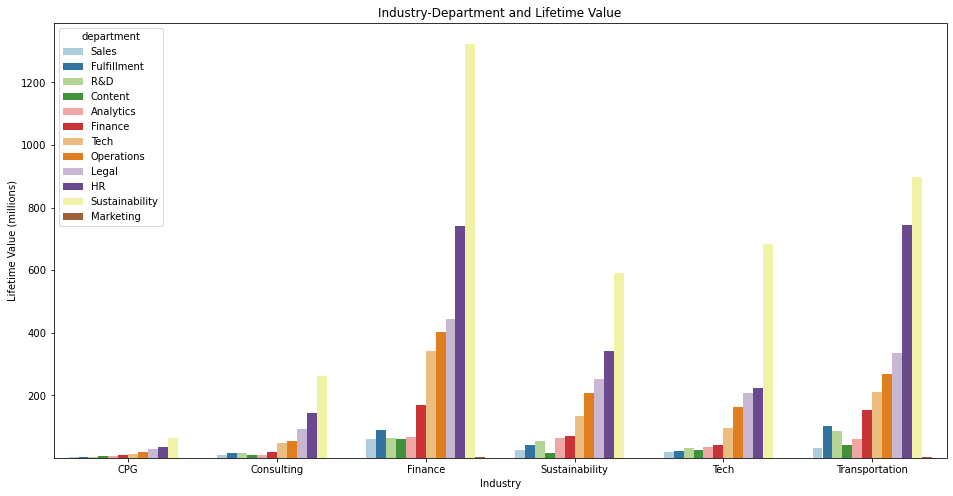

In [44]:
plt.figure(figsize=(16,8))
sns.barplot(data=ltv,x='industry',y='lifetime_value',hue='department',ci=None,palette='Paired')
plt.ylabel('Lifetime Value (millions)')
plt.xlabel('Industry')
plt.yticks(ticks=[200000000,400000000,600000000,800000000,1000000000,1200000000],
           labels=['200','400','600','800','1000','1200']);
plt.title('Industry-Department and Lifetime Value')
plt.savefig('Industry-Department and Lifetime Value.jpg')
plt.show()

In [45]:
master.groupby(['state']).count()['internal_id']

state
AZ    1053
CA    1024
MA    1489
NJ     138
NY     374
OR     832
PA    1924
TX    2475
WA     691
Name: internal_id, dtype: int64

In [46]:
master.columns

Index(['internal_id', 'external_id', 'first_name', 'last_name', 'work_email',
       'external_email', 'phone', 'street', 'city', 'state', 'postal_code',
       'account', 'title', 'department', 'industry', 'joined', 'cancelled',
       'lifetime_value'],
      dtype='object')

In [47]:
pull_date = master['joined'].max()

In [48]:
master['joined'] = pd.to_datetime(master['joined'])

In [49]:
master['cancelled'] = pd.to_datetime(master['cancelled'])

In [50]:
# arrays more efficient

days_subscribed = []

for n in range(0,len(master)):
    if master['cancelled'].isnull().iloc[n] == True:
        days_subscribed.append(pd.to_datetime(pull_date) - master['joined'].iloc[n])
    else:
        days_subscribed.append(master['cancelled'].iloc[n] - master['joined'].iloc[n])

In [51]:
days_subscribed

[Timedelta('241 days 00:00:00'),
 Timedelta('761 days 00:00:00'),
 Timedelta('266 days 00:00:00'),
 Timedelta('818 days 00:00:00'),
 Timedelta('158 days 00:00:00'),
 Timedelta('891 days 00:00:00'),
 Timedelta('948 days 00:00:00'),
 Timedelta('439 days 00:00:00'),
 Timedelta('854 days 00:00:00'),
 Timedelta('339 days 00:00:00'),
 Timedelta('229 days 00:00:00'),
 Timedelta('242 days 00:00:00'),
 Timedelta('161 days 00:00:00'),
 Timedelta('86 days 00:00:00'),
 Timedelta('768 days 00:00:00'),
 Timedelta('680 days 00:00:00'),
 Timedelta('559 days 00:00:00'),
 Timedelta('226 days 00:00:00'),
 Timedelta('541 days 00:00:00'),
 Timedelta('516 days 00:00:00'),
 Timedelta('164 days 00:00:00'),
 Timedelta('556 days 00:00:00'),
 Timedelta('778 days 00:00:00'),
 Timedelta('137 days 00:00:00'),
 Timedelta('407 days 00:00:00'),
 Timedelta('154 days 00:00:00'),
 Timedelta('153 days 00:00:00'),
 Timedelta('703 days 00:00:00'),
 Timedelta('268 days 00:00:00'),
 Timedelta('914 days 00:00:00'),
 Timedelta(

In [52]:
master['days_subscribed'] = pd.DataFrame(days_subscribed)

In [53]:
master['days_subscribed']

0      241 days
1      761 days
2      266 days
3      818 days
4      158 days
         ...   
9995    34 days
9996   680 days
9997   665 days
9998   165 days
9999    60 days
Name: days_subscribed, Length: 10000, dtype: timedelta64[ns]

In [54]:
long_term_cust = master[master['days_subscribed'] > '1000 days']
long_term_cust

,internal_id,external_id,first_name,last_name,work_email,external_email,phone,street,city,state,postal_code,account,title,department,industry,joined,cancelled,lifetime_value,days_subscribed
105,WwklBtDLo2v1,nNZYIQGyVhOi,David,Jimenez,djimenez@cohenmckay.org,djimenez@cohenmckay.org,001-782-114-7159,41898 Carr Garden,East Jasonfort,PA,38636,Cohen-Mckay,English as a foreign language teacher,Sustainability,Transportation,2017-12-26,NaT,5664200,1122 days
132,WwklBtDLoJKH,nNZYIQGyVAzC,Joanna,Snow,jsnow@guzmanjohnsfischer.org,jsnow@guzmanjohnsfischer.org,535.731.5738,00687 Smith Oval,Hudsonborough,PA,94976,"Guzman, Johns and Fischer","Nurse, learning disability",Sustainability,Finance,2017-08-08,2020-06-24,4154600,1051 days
224,WwklBtDLorby,nNZYIQGyVS8L,David,Atkinson,datkinson@mcculloughfreemanbryant.com,datkinson@mcculloughfreemanbryant.com,+1-306-293-2383,5174 Wang Lock,Charlesbury,CA,73527,"Mccullough, Freeman and Bryant",Illustrator,HR,Finance,2018-02-10,NaT,3122000,1076 days
250,WwklBtDLoJ7F,nNZYIQGyVAcE,Jennifer,Blair,jblair@blakereese.com,jblair@blakereese.com,713.841.1481,28577 Lester Brooks,Lake Brenda,OR,9905,Blake-Reese,Aeronautical engineer,Sustainability,Sustainability,2017-09-30,NaT,4791000,1209 days
312,WwklBtDLoJb5,nNZYIQGyVA8e,Tony,Green,tgreen@buchananmcdonald.com,tgreen@buchananmcdonald.com,001-000-439-1280,115 Megan Drive,Maynardview,CA,32942,Buchanan-Mcdonald,Chemical engineer,R&D,CPG,2018-02-27,NaT,1766600,1059 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,WwklBtDLoMT0,nNZYIQGyVxqj,Vincent,Wilson,vwilson@bakerhunt.com,VincentWilson80@aol.com,2783589600,2494 Susan Islands Apt. 850,Port Jesseborough,PA,65105,Baker-Hunt,"Engineer, biomedical",Sustainability,Tech,2018-03-04,NaT,931200,1054 days
9958,WwklBtDLo2eu,nNZYIQGyVh5P,Virginia,Owens,vowens@taylorhamptonchase.com,vowens609@gmail.com,001-381-873-5129,9350 Carlos Coves,North Shawn,TX,93042,"Taylor, Hampton and Chase",Information officer,HR,Finance,2017-07-04,NaT,944500,1297 days
9970,WwklBtDLoAd3,nNZYIQGyVJ6g,Wesley,Smith,wsmith@birdgroup.com,wsmith602@gmail.com,(254)036-7557x7038,105 Summer Shoals Apt. 492,Sarahtown,OR,12037,Bird Group,Herbalist,Sustainability,Sustainability,2017-08-26,NaT,3172800,1244 days
9974,WwklBtDLoM1E,nNZYIQGyVxiF,William,Benton,wbenton@murphymiller.com,wbenton669@sbcglobal.net,536.652.5058,628 Pace Drives,West Sandyfurt,NY,88732,Murphy-Miller,"Conservator, museum/gallery",HR,Finance,2016-12-12,NaT,405800,1501 days


In [55]:
long_term_cust.groupby(['state']).count()['internal_id'].sort_values(ascending=False)

state
PA    124
CA     74
OR     67
MA     59
NY     39
TX     30
AZ     19
NJ      9
WA      3
Name: internal_id, dtype: int64

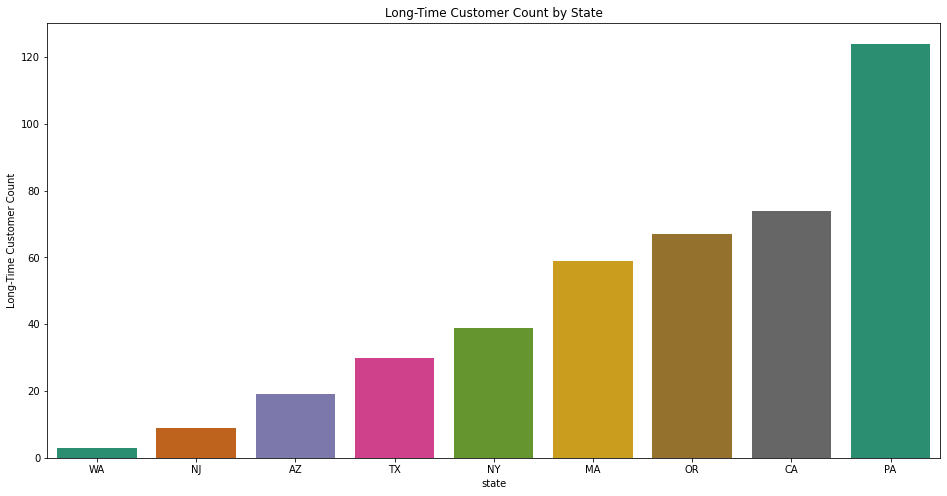

In [56]:
plt.figure(figsize=(16,8))
sns.countplot(data=long_term_cust,x='state',order=long_term_cust['state'].value_counts(ascending=True).index,palette='Dark2')
plt.ylabel('Long-Time Customer Count');
plt.title('Long-Time Customer Count by State')
plt.savefig('Customer Count by State.jpg')
plt.show()

In [57]:
master.groupby(['department'],as_index=False).sum()[['department','lifetime_value']].sort_values(['lifetime_value'],ascending=True)

,department,lifetime_value
6,Marketing,8004800
9,Sales,147287400
1,Content,153863600
0,Analytics,239322700
8,R&D,252382200
3,Fulfillment,273690400
2,Finance,463270600
11,Tech,843438700
7,Operations,1113354300
5,Legal,1356234900


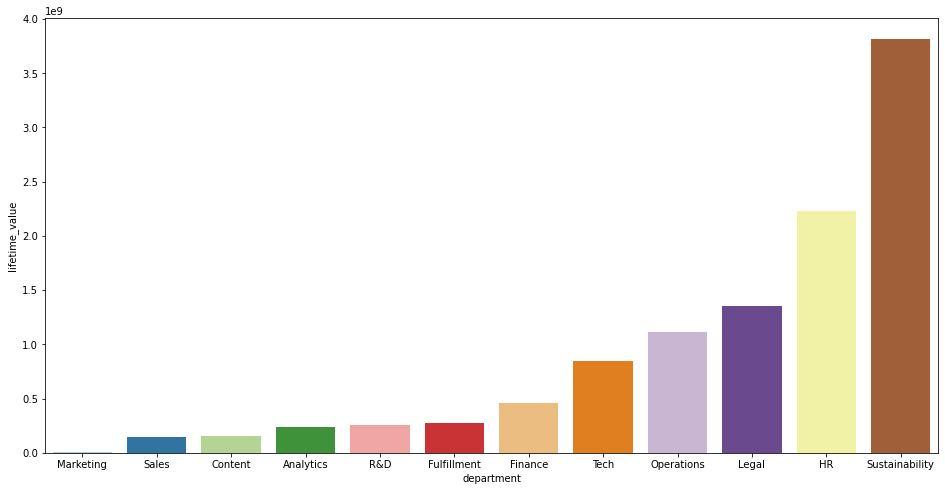

In [60]:
plt.figure(figsize=(16,8))
sns.barplot(data=departments,x='department',y='lifetime_value',ci=None,palette='Paired')
plt.show()

In [59]:
departments = master.groupby(['department'],as_index=False).sum()[['department','lifetime_value']].sort_values(['lifetime_value'],ascending=True)

In [61]:
agg_dep1 = departments.iloc[0:9].sum()

In [62]:
agg_dep2 = departments.iloc[9:11].sum()

In [63]:
sustain = departments.iloc[11]

In [64]:
comparison_dep = pd.concat([agg_dep1,agg_dep2,sustain],axis=1)

In [65]:
comparison_dep = pd.DataFrame(comparison_dep).transpose()

In [66]:
comparison_dep

,department,lifetime_value
0,MarketingSalesContentAnalyticsR&DFulfillmentFi...,3494614700
1,LegalHR,3585439900
10,Sustainability,3819377000


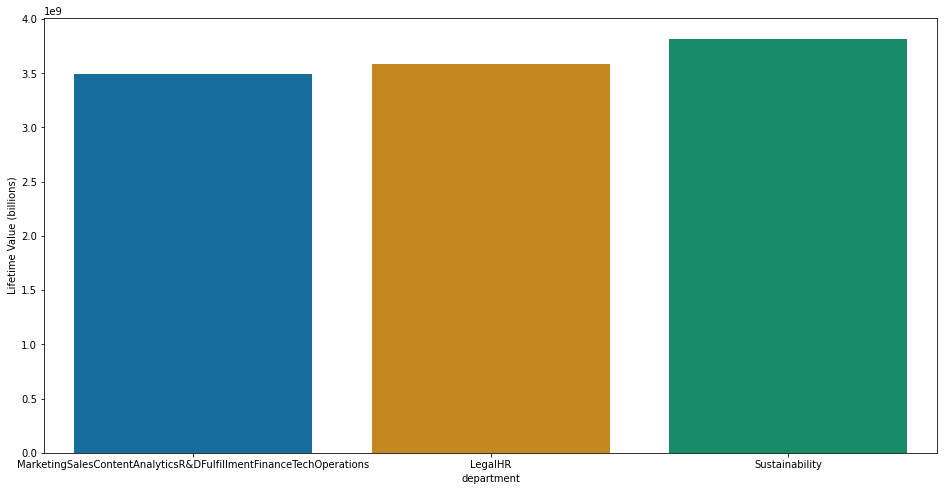

In [67]:
plt.figure(figsize=(16,8))
sns.barplot(data=comparison_dep,x='department',y='lifetime_value',ci=None,palette='colorblind')
plt.ylabel('Lifetime Value (billions)')
plt.savefig('Department(agg) vs Lifetime Value.jpg')
plt.show()

In [68]:
marketing = master[master['department'] == 'Marketing'].groupby(['industry'],as_index=False).sum()[['industry','lifetime_value']].sort_values('lifetime_value',ascending=True)
master[master['department'] == 'Marketing'].groupby(['industry'],as_index=False).sum()[['industry','lifetime_value']].sort_values('lifetime_value',ascending=True)

# Once we drill down, we can see that marketing customers are only present within 4 out of the 6

,industry,lifetime_value
2,Tech,462400
1,Sustainability,839500
3,Transportation,2989300
0,Finance,3713600


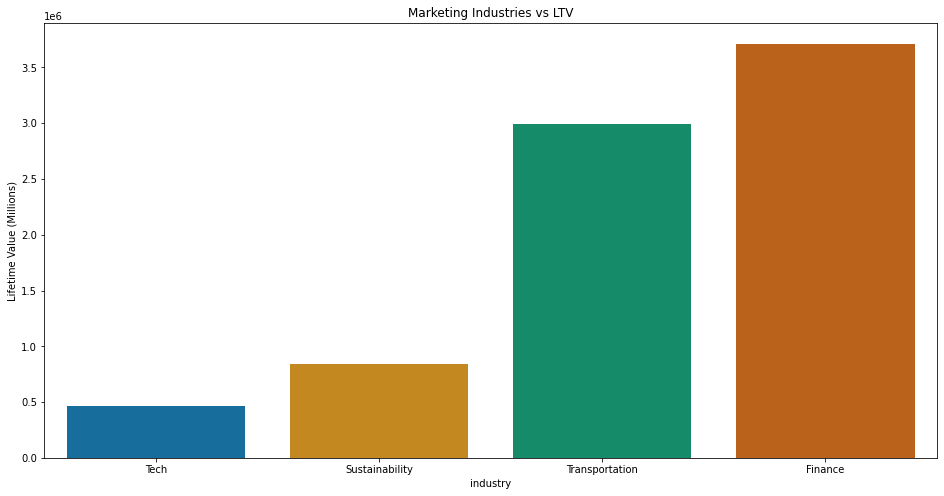

In [69]:
plt.figure(figsize=(16,8))
sns.barplot(data=marketing,x='industry',y='lifetime_value',ci=None,palette='colorblind')
plt.ylabel('Lifetime Value (Millions)')
plt.title('Marketing Industries vs LTV')
plt.savefig('Marketing Industries vs LTV.jpg')
plt.show()

In [61]:
# Predictions

master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   internal_id      10000 non-null  object         
 1   external_id      10000 non-null  object         
 2   first_name       10000 non-null  object         
 3   last_name        10000 non-null  object         
 4   work_email       10000 non-null  object         
 5   external_email   10000 non-null  object         
 6   phone            10000 non-null  object         
 7   street           10000 non-null  object         
 8   city             10000 non-null  object         
 9   state            10000 non-null  object         
 10  postal_code      10000 non-null  float64        
 11  account          10000 non-null  object         
 12  title            10000 non-null  object         
 13  department       10000 non-null  object         
 14  industry         10000 

In [78]:
master['title'].value_counts()

Radio broadcast assistant             29
Writer                                28
Tourist information centre manager    27
Academic librarian                    27
Video editor                          26
                                      ..
Bookseller                             7
Firefighter                            6
Arts development officer               6
Primary school teacher                 6
Nurse, adult                           6
Name: title, Length: 639, dtype: int64

In [62]:
master['postal_code'].value_counts()

10754    4
89844    3
68762    3
18895    3
57190    3
        ..
74163    1
1011     1
42852    1
42179    1
58196    1
Name: postal_code, Length: 9508, dtype: int64

In [63]:
master['account'].value_counts()

Castro-Wood                        10
Hall-Mack                           9
Hale and Sons                       9
Sanchez and Sons                    8
Martin, Mccullough and Harrison     8
                                   ..
Lee, Fields and Boyd                1
Scott Ltd                           1
Mckay, Doyle and Flores             1
Brewer-Morris                       1
Smith-Schmitt                       1
Name: account, Length: 4050, dtype: int64

In [64]:
master[master['lifetime_value'].isnull()]

,internal_id,external_id,first_name,last_name,work_email,external_email,phone,street,city,state,postal_code,account,title,department,industry,joined,cancelled,lifetime_value,days_subscribed
746,WwklBtDLorvC,nNZYIQGyVSOH,Nicole,Garner,nicole.garner@hallsimpsonreyes.com,nicole.garner@hallsimpsonreyes.com,(048)741-6179x96204,17525 Stacey Causeway Suite 038,East Karenland,MA,53315,"Hall, Simpson and Reyes",Diplomatic Services operational officer,Fulfillment,Sustainability,2020-02-11,NaT,NaN,345 days
792,WwklBtDLoAyh,nNZYIQGyVJL2,Susan,Williams,swilliams@villegasmonroe.com,swilliams@villegasmonroe.com,577.673.6495x633,514 Victoria Vista Suite 388,Jacobshire,TX,52129,Villegas-Monroe,Research scientist (life sciences),Sustainability,Consulting,2020-01-29,NaT,NaN,358 days
1357,WwklBtDLoJRH,nNZYIQGyVAsC,Brad,Mullen,bmullen@williamsyorkbrandt.com,bmullen@williamsyorkbrandt.com,+1-132-590-9178,57638 Curtis Loop Suite 228,Woodport,PA,2521,"Williams, York and Brandt",Firefighter,Sustainability,Consulting,2018-06-30,NaT,NaN,936 days
2882,WwklBtDLoJsf,nNZYIQGyVAR4,Megan,Williams,megan.williams@jonesgroup.com,megan.williams@jonesgroup.com,(669)038-4997,582 Michael Shore Suite 660,Leefurt,AZ,13237,Jones Group,Manufacturing systems engineer,Fulfillment,Transportation,2020-07-11,NaT,NaN,194 days
3230,WwklBtDLoOef,nNZYIQGyVv54,Greg,Todd,gtodd@barrettgroup.net,gtodd@barrettgroup.net,001-587-014-5739,94342 Rachel Heights,New Ginaburgh,OR,78006,Barrett Group,"Geologist, engineering",Fulfillment,Finance,2018-01-01,2019-04-30,NaN,484 days
3407,WwklBtDLo9RV,nNZYIQGyVaso,Kelsey,Gill,kgill@chenkimholt.com,kgill@chenkimholt.com,+1-512-713-7706,8810 Denise Mountains Suite 488,North Brendabury,WA,72711,"Chen, Kim and Holt",Chief Operating Officer,Operations,Finance,2019-05-23,NaT,NaN,609 days
5654,WwklBtDLoOTe,nNZYIQGyVvq5,Reginald,Ray,rray@hammondroth.com,rray@hammondroth.com,001-240-409-8389x677,078 Fred Lodge,Daniellechester,MA,16054,Hammond-Roth,Logistics and distribution manager,HR,Finance,2020-09-27,NaT,NaN,116 days
6840,WwklBtDLo9pS,nNZYIQGyVaUr,Kevin,Martinez,kevin.martinez@christensensons.com,kevin.martinez@christensensons.com,+1-521-514-3692x031,2442 Peter Dale,South Jefferyland,TX,86070,Christensen and Sons,Energy engineer,HR,Sustainability,2019-03-10,2019-05-31,NaN,82 days
6933,WwklBtDLo2nv,nNZYIQGyVhWO,Dawn,Coleman,dcoleman@caldwelljonesjohnson.org,dcoleman@caldwelljonesjohnson.org,0906788115,966 Gregory Valley,Miguelville,AZ,36104,"Caldwell, Jones and Johnson",Insurance claims handler,Tech,Transportation,2020-01-29,NaT,NaN,358 days
7087,WwklBtDLor75,nNZYIQGyVSce,Carly,Kirk,carly.kirk@corteztuckerhughes.com,carly.kirk@corteztuckerhughes.com,(512)184-1363x7513,2113 Joshua Highway,East Andrew,PA,71106,"Cortez, Tucker and Hughes","Loss adjuster, chartered",HR,Transportation,2018-02-03,2020-08-14,NaN,923 days


In [106]:
# Adjusting the datatype of difference and renaming a column, since any ML can't take in a timedelta dtype. So I'm trying to
# change it to an int

master['days_subscribed'] = master['days_subscribed'].dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [107]:
first_model = master[['state','department','industry','days_subscribed','lifetime_value']]

<AxesSubplot:xlabel='lifetime_value'>

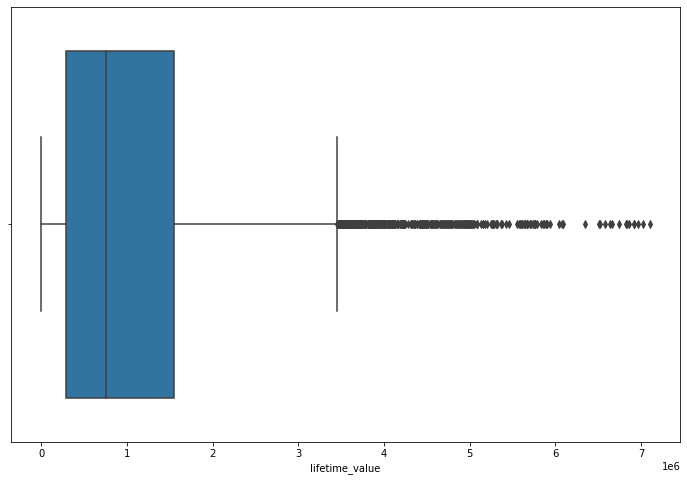

In [83]:
# Outlier removal
plt.figure(figsize=(12,8))
sns.boxplot(data=first_model,x='lifetime_value')

In [84]:
stats = first_model['lifetime_value'].describe()

In [85]:
IQR = stats['75%'] - stats['25%']

In [86]:
IQR

1266675.0

In [87]:
lower_range = stats['25%'] - (1.5 * IQR)
upper_range = stats['75%'] + (1.5 * IQR)

In [88]:
lower_range

-1614262.5


In [73]:
upper_range

3452437.5

In [95]:
print(f"Outliers made up {round(len(first_model[first_model['lifetime_value'] > 3452438])/len(first_model)*100,2)}% of the original dataset.")

Outliers made up 4.1% of the original dataset.


In [108]:
first_model = first_model[first_model['lifetime_value'] < 3452438]

In [109]:
first_model = first_model[first_model['lifetime_value'].notnull()]

In [110]:
first_model = pd.get_dummies(first_model,drop_first=True)
first_model

,days_subscribed,lifetime_value,state_CA,state_MA,state_NJ,state_NY,state_OR,state_PA,state_TX,state_WA,...,department_Operations,department_R&D,department_Sales,department_Sustainability,department_Tech,industry_Consulting,industry_Finance,industry_Sustainability,industry_Tech,industry_Transportation
0,241,681400.0000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,266,1357600.0000,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,818,1838000.0000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,158,111700.0000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,891,2331100.0000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,48800.0000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9996,680,2388700.0000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,665,1712400.0000,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9998,165,392600.0000,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [111]:
# Need to rerun this so that we can see the correlation values, otherwise they would be rounded

pd.set_option('display.float_format', lambda x: '%.4f' % x)

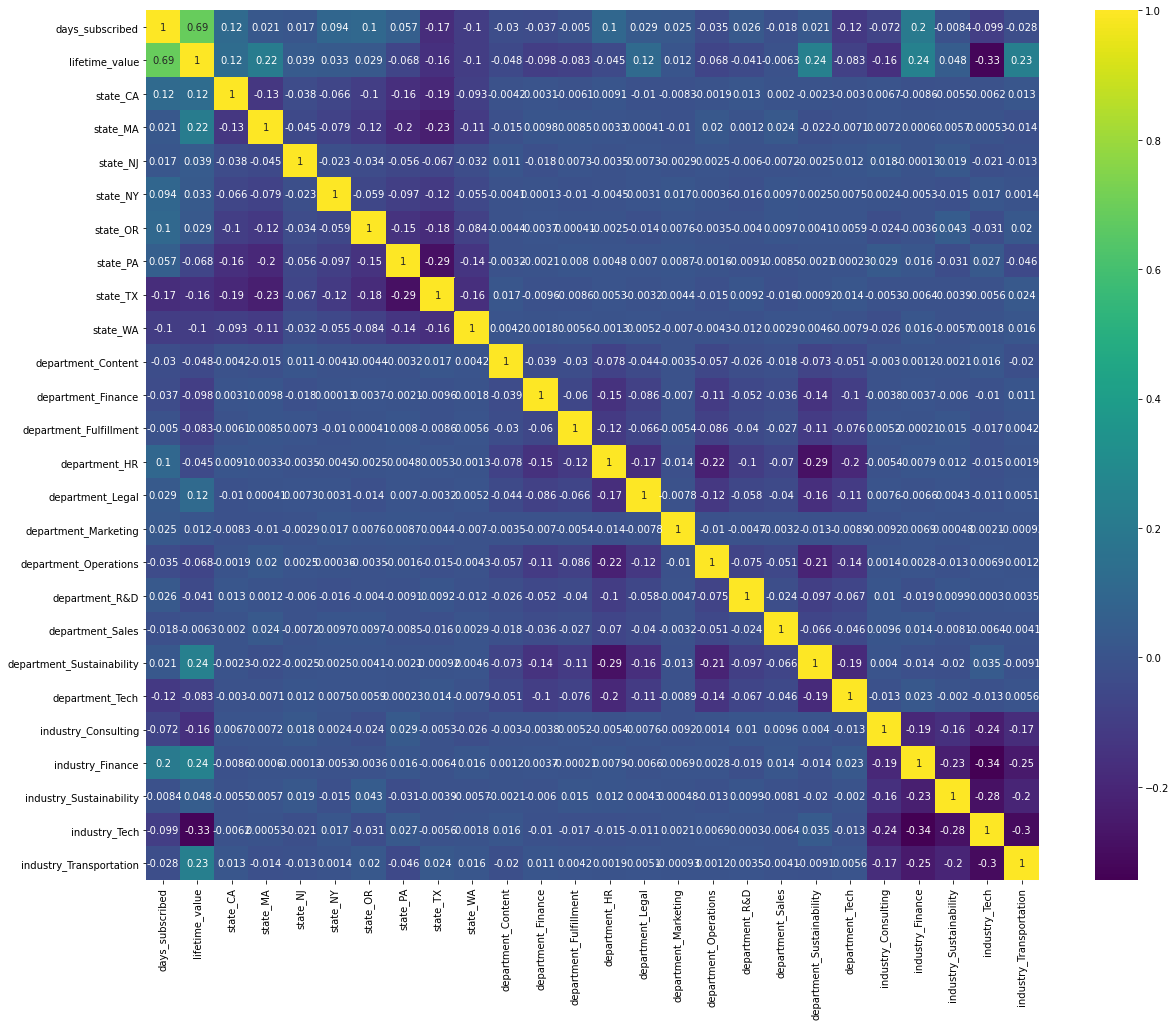

In [112]:
plt.figure(figsize=(20,16))
sns.heatmap(first_model.corr(),annot=True,cmap='viridis')
plt.savefig('Lifetime Value Correlation Heatmap.jpg')
plt.show()

In [81]:
first_model.corr()['lifetime_value'].sort_values(ascending=False)[1:]

days_subscribed              0.6884
industry_Finance             0.2407
department_Sustainability    0.2372
industry_Transportation      0.2296
state_MA                     0.2171
state_CA                     0.1237
department_Legal             0.1180
industry_Sustainability      0.0478
state_NJ                     0.0385
state_NY                     0.0333
state_OR                     0.0287
department_Marketing         0.0115
department_Sales            -0.0063
department_R&D              -0.0410
department_HR               -0.0447
department_Content          -0.0479
department_Operations       -0.0677
state_PA                    -0.0682
department_Tech             -0.0833
department_Fulfillment      -0.0834
department_Finance          -0.0978
state_WA                    -0.1041
industry_Consulting         -0.1576
state_TX                    -0.1599
industry_Tech               -0.3260
Name: lifetime_value, dtype: float64

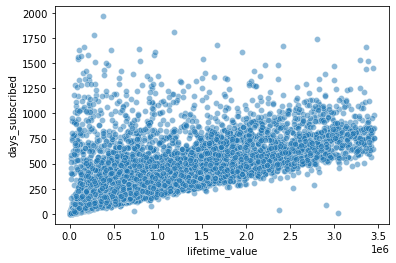

In [229]:
# there seems to be a ~somewhat~ linear relationship between lifetime_value and days_subscribed. There is a lot of variance though.

sns.scatterplot(x='lifetime_value',y='days_subscribed',alpha=0.5,data=first_model)
plt.savefig('Lifetime Value vs. Days Subscribed.jpg')
plt.show()

In [128]:
X = first_model.drop('lifetime_value',axis=1)
y = first_model['lifetime_value']

In [131]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state= 101101)

In [134]:
from sklearn.linear_model import LinearRegression

In [86]:
linear_model = LinearRegression()

In [87]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [88]:
linear_preds = linear_model.predict(X_test)

In [139]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [90]:
# MAE

round(mean_absolute_error(y_test, linear_preds),3)

273276.594

In [91]:
# RMSE

round(np.sqrt(mean_squared_error(y_test,linear_preds)),3)

430960.135

In [92]:
linear_rmse = round(np.sqrt(mean_squared_error(y_test,linear_preds)),4)

In [93]:
# Baseline

round(master['lifetime_value'].mean())

1091253

In [124]:
# polynomial features

from sklearn.preprocessing import PolynomialFeatures

In [95]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,5):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.10, random_state=101101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

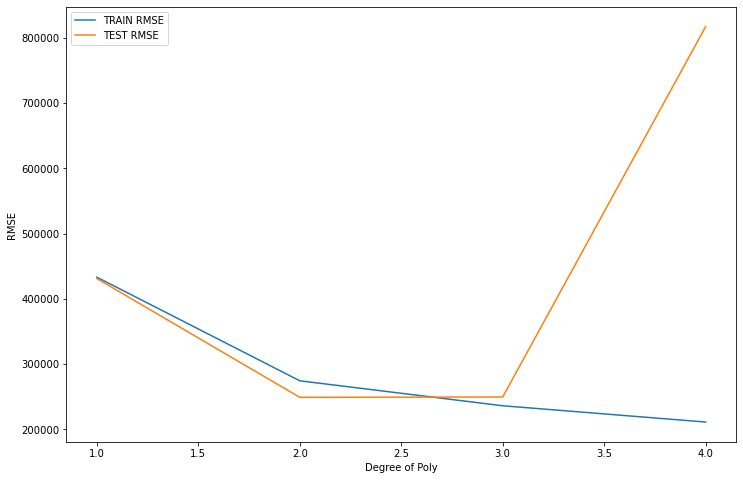

In [96]:
plt.figure(figsize=(12,8))
plt.plot(range(1,5),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,5),test_rmse_errors,label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('Polynomial Degree Test vs Train RMSE.jpg')
plt.show()

In [129]:
# we will use 2nd degree polynomial fit for our model
poly_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [132]:
# Retraining to avoid any funkiness

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.10, random_state=101101)

In [135]:
poly_model = LinearRegression()

In [136]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [137]:
poly_preds = poly_model.predict(X_test)

In [140]:
round(mean_absolute_error(y_test, poly_preds),3)

130743.005

In [141]:
round(np.sqrt(mean_squared_error(y_test,poly_preds)),3)

248924.918

In [104]:
poly_rmse = round(np.sqrt(mean_squared_error(y_test,poly_preds)),4)

In [105]:
# Ridge Regression

from sklearn.linear_model import RidgeCV

In [106]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0, 25.0, 50.0),scoring='neg_mean_squared_error')

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state= 101101)

In [108]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. , 25. , 50. ]),
        scoring='neg_mean_squared_error')

In [109]:
ridge_cv_model.alpha_

1.0

In [110]:
ridge_preds = ridge_cv_model.predict(X_test)

In [111]:
round(mean_absolute_error(y_test,ridge_preds),3)

273175.186

In [112]:
round(np.sqrt(mean_squared_error(y_test,ridge_preds)),3)

430945.081

In [113]:
ridge_rmse = round(np.sqrt(mean_squared_error(y_test,ridge_preds)),4)

In [114]:
# Lasso

from sklearn.linear_model import LassoCV

In [115]:
lasso_cv_model = LassoCV(cv=5,max_iter=100000)

In [116]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, max_iter=100000)

In [117]:
lasso_cv_model.coef_

array([2123.47640796,    0.        ,    0.        ,    0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ])

In [118]:
lasso_preds = lasso_cv_model.predict(X_test)

In [119]:
round(mean_absolute_error(y_test,lasso_preds),3)

398465.129

In [120]:
round(np.sqrt(mean_squared_error(y_test,lasso_preds)),3)

600796.024

In [121]:
lasso_rmse = round(np.sqrt(mean_squared_error(y_test,lasso_preds)),4)

In [122]:
# Support vector regression

from sklearn.svm import LinearSVR

In [123]:
svr = LinearSVR(C=1000,max_iter=100000)

In [124]:
svr.fit(X_train,y_train)

LinearSVR(C=1000, max_iter=100000)

In [125]:
svr_preds = svr.predict(X_test)

In [126]:
round(mean_absolute_error(y_test,svr_preds),3)

257073.331

In [127]:
round(np.sqrt(mean_squared_error(y_test,svr_preds)),3)

496424.117

In [128]:
svr_rmse = round(np.sqrt(mean_squared_error(y_test,svr_preds)),4)

In [129]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

In [130]:
k_values = list(range(1,30))
errors = []


for n in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    knn_preds = knn_model.predict(X_test)
    
    errors.append(round(np.sqrt(mean_squared_error(y_test,knn_preds)),3))

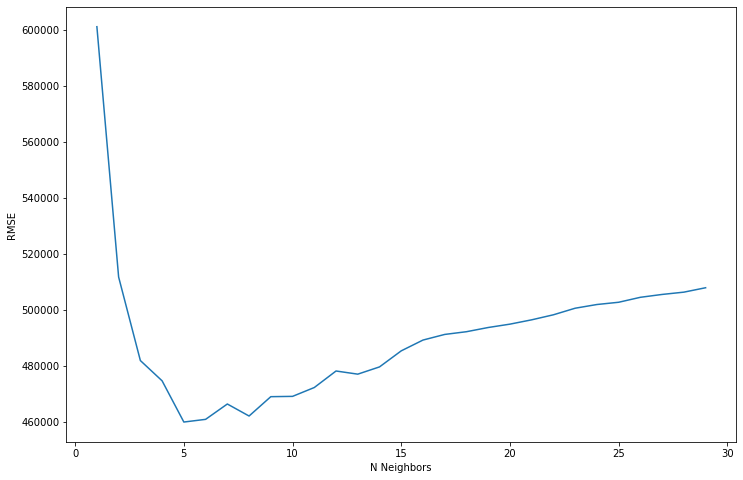

In [131]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30),errors)
plt.ylabel('RMSE')
plt.xlabel('N Neighbors')
plt.savefig('RMSE vs N Neighbors.jpg')
plt.show()

In [132]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [133]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [134]:
knn_preds = knn_model.predict(X_test)

In [135]:
round(mean_absolute_error(y_test,knn_preds),3)

282368.225

In [136]:
round(np.sqrt(mean_squared_error(y_test,knn_preds)),3)

459961.72

In [137]:
knn_rmse = round(np.sqrt(mean_squared_error(y_test,knn_preds)),4)

In [138]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [139]:
base_tree_model = DecisionTreeRegressor()

In [140]:
param_grid = {'max_depth':list(range(1,20))}

In [141]:
# Using a grid search to select for max depth

from sklearn.model_selection import GridSearchCV

In [142]:
tree_grid = GridSearchCV(base_tree_model,param_grid,scoring='neg_root_mean_squared_error')

In [143]:
tree_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_root_mean_squared_error')

In [144]:
tree_grid.best_params_

{'max_depth': 10}

In [145]:
tree_model = DecisionTreeRegressor(max_depth=9)

In [146]:
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [147]:
tree_preds = tree_model.predict(X_test)

In [148]:
round(mean_absolute_error(y_test,tree_preds),3)

152627.011

In [149]:
round(np.sqrt(mean_squared_error(y_test,tree_preds)),3)

291229.872

In [150]:
tree_rmse = round(np.sqrt(mean_squared_error(y_test,tree_preds)),4)

In [151]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

# The below code are the results from running a grid search to find optimal parameters. I am leaving it as comments because the
# fitting process takes a while

In [152]:
base_rfr = RandomForestRegressor()

In [153]:
param_grid = {
              'max_depth':list(range(1,11)),
              'bootstrap':['True','False'],
              'oob_score':['True','False']
             }             

In [154]:
# Using a grid search again to select optimal hyperparameters

rfr_grid = GridSearchCV(base_rfr,param_grid,scoring='neg_root_mean_squared_error')

In [155]:
rfr_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['True', 'False'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'oob_score': ['True', 'False']},
             scoring='neg_root_mean_squared_error')

In [156]:
rfr_grid.best_params_

{'bootstrap': 'True', 'max_depth': 10, 'oob_score': 'False'}

In [172]:
rfr = RandomForestRegressor(bootstrap=True,max_depth=10,oob_score=False,random_state=101101)

In [173]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=101101)

In [174]:
rfr_preds = rfr.predict(X_test)

In [175]:
round(mean_absolute_error(y_test,rfr_preds),3)

130540.174

In [176]:
round(np.sqrt(mean_squared_error(y_test,rfr_preds)),3)

267579.65

In [177]:
rfr_rmse = round(np.sqrt(mean_squared_error(y_test,rfr_preds)),4)

In [178]:
RMSE = [linear_rmse,poly_rmse,ridge_rmse,lasso_rmse,svr_rmse,knn_rmse,tree_rmse,rfr_rmse]

In [179]:
RMSE

[430960.1354,
 248924.9182,
 430945.0808,
 600796.0236,
 496424.1173,
 459961.7195,
 291229.8722,
 267579.6505]

In [180]:
final_rmse = pd.DataFrame(data = RMSE,index=['Linear','Polynomial','Ridge','LASSO',
                           'SVR','KNN','Decision Tree','Random Forest'],columns=['RMSE'])

In [207]:
# Based on our final model's output, the polynomial regression with degree 2 had the lowest RMSE from the test set. This will
# be the model that I will use for predicting the missing lifetime value entries

final_rmse.sort_values(['RMSE'])

,RMSE
Polynomial,248925
Random Forest,267580
Decision Tree,291230
Ridge,430945
Linear,430960
KNN,459962
SVR,496424
LASSO,600796


In [116]:
# Model Deployment
# It's possible this code may be redundant, but I just want to be sure the sizes of the dataframes match so I won't run into
# any issues when predicting new values

dummies = pd.get_dummies(master[['state','department','industry']],drop_first=True)

In [117]:
len(dummies)

10000

In [118]:
master.columns

Index(['internal_id', 'external_id', 'first_name', 'last_name', 'work_email',
       'external_email', 'phone', 'street', 'city', 'state', 'postal_code',
       'account', 'title', 'department', 'industry', 'joined', 'cancelled',
       'lifetime_value', 'days_subscribed'],
      dtype='object')

In [119]:
new_master = pd.concat([master.drop(['state','department',
                                 'industry','internal_id',
                                'first_name','last_name',
                                'work_email','phone',
                                'street','city','postal_code',
                                'account','title','external_id','joined','cancelled','external_email'],axis=1),dummies],axis=1)

In [120]:
missing_ltv = new_master[new_master['lifetime_value'].isnull()]

In [121]:
missing_ltv = missing_ltv.drop('lifetime_value',axis=1)

In [122]:
missing_ltv

,days_subscribed,state_CA,state_MA,state_NJ,state_NY,state_OR,state_PA,state_TX,state_WA,department_Content,...,department_Operations,department_R&D,department_Sales,department_Sustainability,department_Tech,industry_Consulting,industry_Finance,industry_Sustainability,industry_Tech,industry_Transportation
746,345,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
792,358,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1357,936,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2882,194,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3230,484,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3407,609,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
5654,116,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6840,82,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6933,358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7087,923,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [142]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly_converter.fit_transform(missing_ltv)

In [143]:
poly_model.predict(poly_features)

array([1298463.06908867, 1104132.01318966, 1912725.75474558,
        668747.22469376,  997633.41306295, 1370713.20647557,
        457842.11805368,  166318.78660568, 1476774.50408533,
       2499000.97404462,  376551.3413114 , 2894767.31275777])

In [144]:
final_preds = pd.Series(poly_model.predict(poly_features))

In [145]:
final_preds = round(final_preds)

In [148]:
missing_index = missing_ltv.index

In [150]:
missing_index

Int64Index([746, 792, 1357, 2882, 3230, 3407, 5654, 6840, 6933, 7087, 7230,
            7879],
           dtype='int64')

In [151]:
missing_index = pd.Series(missing_index)

In [152]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [153]:
values = pd.DataFrame(final_preds).set_index(missing_index)

In [154]:
values = values.rename(columns={0:'lifetime_value'})

In [155]:
internal_ids = []

for n in missing_index:
    internal_ids.append(master.loc[n]['internal_id'])

In [156]:
internal_ids = pd.DataFrame(index=missing_index,data=internal_ids)

In [157]:
missing_values = pd.concat([internal_ids,values],axis=1)

In [158]:
final = missing_values.rename(columns={0:'internal_id'}).sort_values('internal_id',ascending=False)

In [159]:
final

,internal_id,lifetime_value
746,WwklBtDLorvC,1298463
7879,WwklBtDLorKa,2894767
7087,WwklBtDLor75,2499001
3230,WwklBtDLoOef,997633
5654,WwklBtDLoOTe,457842
7230,WwklBtDLoMxE,376551
2882,WwklBtDLoJsf,668747
1357,WwklBtDLoJRH,1912726
792,WwklBtDLoAyh,1104132
6840,WwklBtDLo9pS,166319
